# Proyek Analisis Data: [E-commerce-public-datase]
- **Nama:** [David Patar Mandaoni Siringoringo]
- **Email:** [m010b4ky1016@bangkit.academy]
- **ID Dicoding:** [m010b4ky1016]

## Menentukan Pertanyaan Bisnis

- Which seller has the highest total sales volume and revenue?
- Which payment method is preferred by buyers, and how does this preference impact their purchasing behavior?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy as sqla
import os
from scipy import stats
from google.colab import drive #im using drive

## Data Wrangling

### Gathering Data

In [ ]:
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/E-Commerce Public Dataset'
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Create a dictionary to store DataFrames
dataframes = {}

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df_name = os.path.splitext(file)[0] + '_df'  # Use the file name (without extension) as the variable name
    dataframes[df_name] = pd.read_csv(file_path)
    "check the head"
    print(f'{df_name}')
    # print(dataframes[df_name].head())

"""its rebundant if you use this part again,
but if you wanna change it you can do that on this part"""
# order_df = dataframes['orders_dataset']
# print(order_df.head())

for df_name, df in dataframes.items():
    globals()[df_name] = df

Mounted at /content/drive
customers_dataset_df
geolocation_dataset_df
order_items_dataset_df
order_payments_dataset_df
order_reviews_dataset_df
sellers_dataset_df
products_dataset_df
orders_dataset_df
product_category_name_translation_df
customers_dataset_modified_df
geolocation_dataset_modified_df
order_items_dataset_modified_df
order_payments_dataset_modified_df
order_reviews_dataset_modified_df
sellers_dataset_modified_df
products_dataset_modified_df
orders_dataset_modified_df
product_category_name_translation_modified_df


In [ ]:
columns_dict = {df_name: set(df.columns) for df_name, df in dataframes.items()}

# Find common columns across all DataFrames
common_columns = set.intersection(*columns_dict.values())

# Print the common columns
print("Common columns across all DataFrames:")
print(common_columns)

# If you want to see which columns are shared between each pair of DataFrames
for df_name1, columns1 in columns_dict.items():
    for df_name2, columns2 in columns_dict.items():
        if df_name1 != df_name2:
            common_cols = columns1.intersection(columns2)
            if common_cols:
                print(f"Common columns between {df_name1} and {df_name2}: {common_cols}")

Common columns across all DataFrames:
set()
Common columns between customers_dataset_df and orders_dataset_df: {'customer_id'}
Common columns between customers_dataset_df and customers_dataset_modified_df: {'customer_city', 'customer_zip_code_prefix', 'customer_state', 'customer_unique_id', 'customer_id'}
Common columns between customers_dataset_df and orders_dataset_modified_df: {'customer_id'}
Common columns between geolocation_dataset_df and geolocation_dataset_modified_df: {'geolocation_lng', 'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_state', 'geolocation_city'}
Common columns between order_items_dataset_df and order_payments_dataset_df: {'order_id'}
Common columns between order_items_dataset_df and order_reviews_dataset_df: {'order_id'}
Common columns between order_items_dataset_df and sellers_dataset_df: {'seller_id'}
Common columns between order_items_dataset_df and products_dataset_df: {'product_id'}
Common columns between order_items_dataset_df and orders_d

**Insight:**
- We can automatically search for the CSV files related to one another, making it easier for us to connect each column later.
- We also can make the dataframe automatically

### Assessing Data

In [ ]:
# SIMPLIFIED
for df_name, df in dataframes.items():
    globals()[df_name] = df
    print(f'Info for {df_name}:')
    df.info()

Info for customers_dataset_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Info for geolocation_dataset_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-nu

In [ ]:
# SIMPLIFIED
for df_name, df in dataframes.items():
    globals()[df_name] = df
    print(f'Missingg value in {df_name}:')
    print(df.isna().sum())

Missingg value in customers_dataset_df:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
Missingg value in geolocation_dataset_df:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
Missingg value in order_items_dataset_df:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
Missingg value in order_payments_dataset_df:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
Missingg value in order_reviews_dataset_df:
review_id                      0
order_id                       0
review_score                   0
review_comment_t

In [ ]:
# SIMPLIFIED
for df_name, df in dataframes.items():
    globals()[df_name] = df
    print(f'Duplication number: {df_name}:')
    print(df.duplicated().sum())

Duplication number: customers_dataset_df:
0
Duplication number: geolocation_dataset_df:
261831
Duplication number: order_items_dataset_df:
0
Duplication number: order_payments_dataset_df:
0
Duplication number: order_reviews_dataset_df:
0
Duplication number: sellers_dataset_df:
0
Duplication number: products_dataset_df:
0
Duplication number: orders_dataset_df:
0
Duplication number: product_category_name_translation_df:
0


In [ ]:
# SIMPLIFIED
for df_name, df in dataframes.items():
    globals()[df_name] = df
    print(f'{df_name}:')
    print(df.describe())

customers_dataset_df:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
geolocation_dataset_df:
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054e+02
order_items_dataset_df:
       order_item_id 

In [ ]:
customers_dataset_df.info()
customers_dataset_df.isna().sum()
print("Duplication number: ", customers_dataset_df.duplicated().sum())
customers_dataset_df.describe()
customers_dataset_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
Duplication number:  0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**All good**


In [ ]:
geolocation_dataset_df.info()
geolocation_dataset_df.isna().sum()
print("Duplication number: ", geolocation_dataset_df.duplicated().sum())
geolocation_dataset_df.describe()
geolocation_dataset_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
Duplication number:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**We got a duplication**

In [ ]:
order_payments_dataset_df.info()
order_payments_dataset_df.isna().sum()
print("Duplication number: ", order_payments_dataset_df.duplicated().sum())
order_payments_dataset_df.describe()
order_payments_dataset_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
Duplication number:  0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**All good**

In [ ]:
order_reviews_dataset_df.info()
order_reviews_dataset_df.isna().sum()
print("Duplication number: ", order_reviews_dataset_df.duplicated().sum())
order_reviews_dataset_df.describe()
order_reviews_dataset_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Duplication number:  0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**We got missing value on  
review_comment_title	87656
review_comment_message	58247**

In [ ]:
order_items_dataset_df.info()
order_items_dataset_df.isna().sum()
print("Duplication number: ", order_items_dataset_df.duplicated().sum())
order_items_dataset_df.describe()
order_items_dataset_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
Duplication number:  0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**something weird on order id, but after I checked, it is normal**

In [ ]:
# This is where i checked it
# Sort the DataFrame by order_item_id in descending order
sorted_df = order_items_dataset_df.sort_values(by='order_item_id', ascending=False)

# Display the top rows to check the largest values
print(sorted_df.head())

                               order_id  order_item_id  \
57317  8272b63d03f5f79c56e9e4120aec44ef             21   
57316  8272b63d03f5f79c56e9e4120aec44ef             20   
11951  1b15974a0141d54e36626dca3fdc731a             20   
75122  ab14fdcfbe524636d65ee38360e22ce8             20   
75121  ab14fdcfbe524636d65ee38360e22ce8             19   

                             product_id                         seller_id  \
57317  79ce45dbc2ea29b22b5a261bbb7b7ee7  2709af9587499e95e803a6498a5a56e9   
57316  270516a3f41dc035aa87d220228f844c  2709af9587499e95e803a6498a5a56e9   
11951  ee3d532c8a438679776d222e997606b3  8e6d7754bc7e0f22c96d255ebda59eba   
75122  9571759451b1d780ee7c15012ea109d4  ce27a3cc3c8cc1ea79d11e561e9bebb6   
75121  9571759451b1d780ee7c15012ea109d4  ce27a3cc3c8cc1ea79d11e561e9bebb6   

       shipping_limit_date  price  freight_value  
57317  2017-07-21 18:25:23    7.8           6.57  
57316  2017-07-21 18:25:23    1.2           7.89  
11951  2018-03-01 02:50:48  100.0  

In [ ]:
products_dataset_df.info()
products_dataset_df.isna().sum()
print("Duplication number: ", products_dataset_df.duplicated().sum())
products_dataset_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
Duplication number:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**we got missing value on
product_category_name	610
product_name_lenght	610
product_description_lenght	610
product_photos_qty	610
product_weight_g	2
product_length_cm	2
product_height_cm	2
product_width_cm	2**

In [ ]:
orders_dataset_df.info()
orders_dataset_df.isna().sum()
print("Duplication number: ", orders_dataset_df.duplicated().sum())
orders_dataset_df.describe()
orders_dataset_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
Duplication number:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**We got missing value on
order_approved_at	160
order_delivered_carrier_date	1783
order_delivered_customer_date	2965**

In [ ]:
orders_dataset_df.order_delivered_customer_date.head()

,order_delivered_customer_date
0,2017-10-10 21:25:13
1,2018-08-07 15:27:45
2,2018-08-17 18:06:29
3,2017-12-02 00:28:42
4,2018-02-16 18:17:02


In [ ]:
orders_dataset_df.order_purchase_timestamp.head()

,order_purchase_timestamp
0,2017-10-02 10:56:33
1,2018-07-24 20:41:37
2,2018-08-08 08:38:49
3,2017-11-18 19:28:06
4,2018-02-13 21:18:39


In [ ]:
sellers_dataset_df.info()
sellers_dataset_df.isna().sum()
print("Duplication number: ", sellers_dataset_df.duplicated().sum())
sellers_dataset_df.describe()
sellers_dataset_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
Duplication number:  0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**All good**

In [ ]:
product_category_name_translation_df.info()
product_category_name_translation_df.isna().sum()
# print("Duplication number: ", product_category_name_translation_df.duplicated().sum())
# product_category_name_translation_df.describe()
product_category_name_translation_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**All good**

### Cleaning Data

In [ ]:
"DUPLICATION geolocation_dataset"
geolocation_dataset_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geolocation_dataset_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
"MISSING VALUE order_reviews_dataset"
order_reviews_dataset_df.info()
order_reviews_dataset_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [ ]:
# order_reviews_dataset_df[order_reviews_dataset_df.review_comment_message.isna()]
# order_reviews_dataset_df[order_reviews_dataset_df.review_comment_title.isna()]

"simplified to"
missing_reviews = order_reviews_dataset_df[
    order_reviews_dataset_df.review_comment_title.isna() |
    order_reviews_dataset_df.review_comment_message.isna()
]

print(missing_reviews)

""" all the data type that is on 'missing value'
is a object data type, so it save to change all of that """

                              review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4            

" all the data type that is on 'missing value'\nis a object data type, so it save to change all of that "

In [ ]:
# order_reviews_dataset_df.review_comment_message.value_counts()
# order_reviews_dataset_df.review_comment_title.value_counts()

"simplified to"
value_counts = order_reviews_dataset_df[[
    'review_comment_title', 'review_comment_message']].apply(pd.Series.value_counts)
print(value_counts)


                                                    review_comment_title  \
\r\n                                                                 NaN   
\r\n\r\n                                                             NaN   
\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n                             NaN   
\r\n\r\n\r\nDe todo o pedido feito no site, est...                   NaN   
\r\n\r\nHouve um impedimento relatado em outro ...                   NaN   
...                                                                  ...   
😃 ótimo 👍                                                            NaN   
😆😆😆😆😆                                                                NaN   
😆😆😆😆😆😆                                                               NaN   
😍😍👧💅 amei e chegou até antes do esperodo                             NaN   
😡😡😡😡😡👎👎👎👎👎\r\nEmpresa sem compromisso com o cli...                   NaN   

                                                    review_comment_message  
\r\n      

In [ ]:
# order_reviews_dataset_df.review_comment_title.fillna (value="No title", inplace=True)
# order_reviews_dataset_df.review_comment_message.fillna (value="No Message", inplace=True)

"simplified to"
columns_to_fill = {
    'review_comment_title': 'No title',
    'review_comment_message': 'No Message'
}

for column, value in columns_to_fill.items():
    order_reviews_dataset_df[column].fillna(value=value, inplace=True)

<ipython-input-68-a54c9b83d5f2>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  order_reviews_dataset_df[column].fillna(value=value, inplace=True)


In [ ]:
"MISSING VALUE products_dataset"
products_dataset_df.info()
products_dataset_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
# products_dataset_df[products_dataset_df.product_category_name.isna()]
# products_dataset_df[products_dataset_df.product_name_lenght.isna()]
# products_dataset_df[products_dataset_df.product_description_lenght.isna()]
# products_dataset_df[products_dataset_df.product_photos_qty.isna()]
# products_dataset_df[products_dataset_df.product_length_cm.isna()]
# products_dataset_df[products_dataset_df.product_height_cm.isna()]
# products_dataset_df[products_dataset_df.product_width_cm.isna()]
# products_dataset_df[products_dataset_df.product_weight_g.isna()]

"simplified to"
columns_to_check = [
    'product_category_name', 'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_length_cm', 'product_height_cm', 'product_width_cm',
    'product_weight_g'
]

for column in columns_to_check:
    print(products_dataset_df[products_dataset_df[column].isna()])

# We encountered an issue where some of the data is of type object while others are of type float64

                             product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN         

In [ ]:
columns_to_fill = [
    'product_category_name', 'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_length_cm', 'product_height_cm', 'product_width_cm',
    'product_weight_g'
]

for column in columns_to_fill:
    if products_dataset_df[column].dtype == 'object':
        products_dataset_df[column].fillna(value='No information', inplace=True)
        # We need to replace the object values with missing information, as we cannot determine them on our own.
    else:
        products_dataset_df[column].fillna(value=0, inplace=True)
        #If we replace it with a word, it will convert the data to the object type,
        #which we want to avoid. Instead, we should change it to a float value, such as 0.
        #This will still allow us to use it for measuring rare occurrences, if necessary.


<ipython-input-71-609e0c16d928>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_dataset_df[column].fillna(value='No information', inplace=True)
<ipython-input-71-609e0c16d928>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [ ]:
"MISSING VALUE orders_dataset"
orders_dataset_df.info()
orders_dataset_df.isna().sum()
# We need to be cautious because the column with missing values is of date type.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
# orders_dataset_df[orders_dataset_df.order_approved_at.isna()]
# orders_dataset_df[orders_dataset_df.order_delivered_carrier_date.isna()]
# orders_dataset_df[orders_dataset_df.order_delivered_customer_date.isna()]

columns_to_check = [
    'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
]

for column in columns_to_check:
    print(orders_dataset_df[orders_dataset_df[column].isna()])

                               order_id                       customer_id  \
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801   ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   
1868   df8282afe61008dc26c6c31011474d02  aa797b187b5466bc6925aaaa4bb3bed1   
2029   8d4c637f1accf7a88a4555f02741e606  b1dd715db389a2077f43174e7a675d07   
2161   7a9d4c7f9b068337875b95465330f2fc  7f71ae48074c0cfec9195f88fcbfac55   
...                                 ...                               ...   
97696  5a00b4d35edffc56b825c3646a99ba9d  6a3bdf004ca96338fb5fad1b8d93c2e6   
98415  227c804e2a44760671a6a5697ea549e4  62e7477e75e542243ee62a0ba73f410f   
98909  e49e7ce1471b4693482d40c2bd3ad196  e4e7ab3f449aeb401f0216f86c2104db   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   

      order_status order_purchase_timestamp order_approved_at  \
1130      

In [ ]:
columns_to_check = [
    'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'
]
# For more information
# Check for missing values that are not paired with 'canceled' in order_status
for column in columns_to_check:
    missing_not_canceled = orders_dataset_df[orders_dataset_df[column].isna() & (orders_dataset_df['order_status'] != 'canceled')]
    print(f"Missing in {column} and order_status is not 'canceled':")
    print(missing_not_canceled)

#I've noticed that some values are not paired with 'canceled' but with other order
#statuses such as 'delivered', 'created', 'invoiced', 'processing', 'unavailable', 'shipped', etc.
#Therefore, we need to adapt our approach accordingly.

Missing in order_approved_at and order_status is not 'canceled':
                               order_id                       customer_id  \
5323   e04abd8149ef81b95221e88f6ed9ab6a  2127dc6603ac33544953ef05ec155771   
7434   b5359909123fa03c50bdb0cfed07f098  438449d4af8980d107bf04571413a8e7   
9238   dba5062fbda3af4fb6c33b1e040ca38f  964a6df3d9bdf60fe3e7b8bb69ed893a   
16567  8a9adc69528e1001fc68dd0aaebbb54a  4c1ccc74e00993733742a3c786dc3c1f   
19031  7013bcfc1c97fe719a7b5e05e61c12db  2941af76d38100e0f8740a374f1a5dc3   
21441  7a4df5d8cff4090e541401a20a22bb80  725e9c75605414b21fd8c8d5a1c2f1d6   
22663  5cf925b116421afa85ee25e99b4c34fb  29c35fc91fc13fb5073c8f30505d860d   
23156  12a95a3c06dbaec84bcfb0e2da5d228a  1e101e0daffaddce8159d25a8e53f2b2   
26800  c1d4211b3dae76144deccd6c74144a88  684cb238dc5b5d6366244e0e0776b450   
38290  d69e5d356402adc8cf17e08b5033acfb  68d081753ad4fe22fc4d410a9eb1ca01   
39334  d77031d6a3c8a52f019764e68f211c69  0bf35cac6cc7327065da879e2d90fae8   
48401  7002

In [ ]:
# We can change the values to 'no information' without altering the data type,
# allowing us to continue using the data effectively.
columns_to_check = [
    'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'
]

placeholder_date = 'No information'

for column in columns_to_check:
    orders_dataset_df[column].fillna(value=placeholder_date, inplace=True)



<ipython-input-75-ceb170cd3189>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  orders_dataset_df[column].fillna(value=placeholder_date, inplace=True)


**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
customers_dataset_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [ ]:
order_items_dataset_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [ ]:
sellers_dataset_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [ ]:
order_reviews_dataset_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No title,No Message,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [ ]:
order_items_dataset_df.groupby(by="seller_id").agg({
    "price": "nunique",
    "price": ["max", "min", "mean", "std"],
    "order_item_id": ["max", "min", "mean", "std"],
    "freight_value": ["max", "min", "mean", "std"]
})

price                                 \
                                     max     min        mean        std   
seller_id                                                                 
0015a82c2db000af6aaaf3ae2ecb0532  895.00  895.00  895.000000   0.000000   
001cca7ae9ae17fb1caed9dfb1094831  199.00   69.90  104.937364  16.153486   
001e6ad469a905060d959994f1b41e4f  250.00  250.00  250.000000        NaN   
002100f778ceb8431b7a1020ff7ab48f  129.90    9.90   22.445455  18.960796   
003554e2dce176b5555353e4f3555ac8  120.00  120.00  120.000000        NaN   
...                                  ...     ...         ...        ...   
ffcfefa19b08742c5d315f2791395ee5   69.90   69.90   69.900000        NaN   
ffdd9f82b9a447f6f8d4b91554cc7dd3  214.00   13.00  105.060000  66.341218   
ffeee66ac5d5a62fe688b9d26f83f534  149.99   89.99  131.418571  14.600918   
fffd5413c0700ac820c7069d66d98c89  636.00   39.80  148.562295  99.766259   
ffff564a4f9085cd26170f4732393726  366.50   11.50   71.315000  76.184454   

                                 order_item_id                          \
                                           max min      mean       std   
seller_id                                                                
0015a82c2db000af6aaaf3ae2ecb0532             1   1  1.000000  0.000000   
001cca7ae9ae17fb1caed9dfb1094831             5   1  1.221757  0.577036   
001e6ad469a905060d959994f1b41e4f             1   1  1.000000       NaN   
002100f778ceb8431b7a1020ff7ab48f             2   1  1.090909  0.290129   
003554e2dce176b5555353e4f3555ac8             1   1  1.000000       NaN   
...                                        ...  ..       ...       ...   
ffcfefa19b08742c5d315f2791395ee5             1   1  1.000000       NaN   
ffdd9f82b9a447f6f8d4b91554cc7dd3             2   1  1.100000  0.307794   
ffeee66ac5d5a62fe688b9d26f83f534             1   1  1.000000  0.000000   
fffd5413c0700ac820c7069d66d98c89             3   1  1.081967  0.331415   
ffff564a4f9085cd26170f4732393726             1   1  1.000000  0.000000   

                                 freight_value                               
                                           max    min       mean        std  
seller_id                                                                    
0015a82c2db000af6aaaf3ae2ecb0532         21.02  21.02  21.020000   0.000000  
001cca7ae9ae17fb1caed9dfb1094831        114.62  14.72  37.046611  13.572742  
001e6ad469a905060d959994f1b41e4f         17.94  17.94  17.940000        NaN  
002100f778ceb8431b7a1020ff7ab48f         34.15   4.91  14.430182   3.973394  
003554e2dce176b5555353e4f3555ac8         19.38  19.38  19.380000        NaN  
...                                        ...    ...        ...        ...  
ffcfefa19b08742c5d315f2791395ee5          9.62   9.62   9.620000        NaN  
ffdd9f82b9a447f6f8d4b91554cc7dd3         98.87  12.19  36.373000  34.371411  
ffeee66ac5d5a62fe688b9d26f83f534         77.98  20.88  29.977857  15.355717  
fffd5413c0700ac820c7069d66d98c89        206.45   9.94  46.454754  39.403779  
ffff564a4f9085cd26170f4732393726         37.19  10.96  17.228000   6.710424  

[3095 rows x 12 columns]

In [ ]:
"Check total items sold"
# Group by seller_id and count the number of items sold by each seller
seller_sales = order_items_dataset_df.groupby('seller_id')['order_item_id'].count().reset_index()

# Rename the columns for better understanding
seller_sales.columns = ['seller_id', 'total_items_sold']

# Sort the sellers by the total number of items sold in descending order
seller_sales = seller_sales.sort_values(by='total_items_sold', ascending=False)

# Display the seller who sold the most items
top_seller = seller_sales.iloc[0]
print(f"The seller with the most items sold is {top_seller['seller_id']} with {top_seller['total_items_sold']} items sold.")

print (seller_sales)

The seller with the most items sold is 6560211a19b47992c3666cc44a7e94c0 with 2033 items sold.
                             seller_id  total_items_sold
1235  6560211a19b47992c3666cc44a7e94c0              2033
881   4a3ca9315b744ce9f8e9374361493884              1987
368   1f50f920176fa81dab994f9023523100              1931
2481  cc419e0650a3c5ba77189a1882b7556a              1775
2643  da8622b14eb17ae2831f4ac5b9dab84a              1551
...                                ...               ...
1172  5f57db27027655e6c6a391601daa0258                 1
1160  5e25c632f9db6cfb8bc100421c2737b6                 1
1159  5e106d93b717c2682b9383da480364a1                 1
2561  d36b07fd3c5088e477a72d1fccfe29d4                 1
1547  7d81e74a4755b552267cd5e081563028                 1

[3095 rows x 2 columns]


In [ ]:
"Check total revenue"
# Calculate the total revenue for each order item
order_items_dataset_df['total_revenue'] = order_items_dataset_df['price'] + order_items_dataset_df['freight_value']

# Group by seller_id and sum the total revenue for each seller
seller_revenue = order_items_dataset_df.groupby('seller_id')['total_revenue'].sum().reset_index()

# Rename the columns for better understanding
seller_revenue.columns = ['seller_id', 'total_revenue']

# Sort the sellers by total revenue in descending order
seller_revenue = seller_revenue.sort_values(by='total_revenue', ascending=False)

# Display the list of sellers from most to least total revenue
print(seller_revenue)

                             seller_id  total_revenue
857   4869f7a5dfa277a7dca6462dcf3b52b2      249640.70
1535  7c67e1448b00f6e969d365cea6b010ab      239536.44
1013  53243585a1d6dc2643021fd1853d8905      235856.68
881   4a3ca9315b744ce9f8e9374361493884      235539.96
3024  fa1c13f2614d7b5c4749cbc52fecda94      204084.73
...                                ...            ...
1370  702835e4b785b67a084280efca355756          18.56
869   4965a7002cca77301c82d3f91b82e1a9          16.36
373   1fa2d3def6adfa70e58c276bb64fe5bb          15.90
1465  77128dec4bec4878c37ab7d6169d6f26          15.22
2519  cf6f6bc4df3999b9c6440f124fb2f687          12.22

[3095 rows x 2 columns]


In [ ]:
"QUESTION 1"
"The data gathering process allows us to identify and analyze all relationships between the dataframes."
# Calculate total revenue in order_items_dataset_df
order_items_dataset_df['total_revenue'] = order_items_dataset_df['price'] + order_items_dataset_df['freight_value']

# Group by seller_id and calculate total revenue and total items sold
seller_revenue = order_items_dataset_df.groupby('seller_id').agg({
    'total_revenue': 'sum',
    'order_item_id': 'count'  # Assuming order_item_id is unique for each item
}).reset_index()

# Rename the columns for better understanding
seller_revenue.columns = ['seller_id', 'total_revenue', 'total_items']

# Sort the sellers by total revenue in descending order
seller_revenue = seller_revenue.sort_values(by='total_revenue', ascending=False)

# Merge with review data to include review scores
best_review_df = pd.merge(
    left=order_items_dataset_df,
    right=order_reviews_dataset_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Calculate average review score for each seller
seller_review_score = best_review_df.groupby('seller_id')['review_score'].mean().reset_index()

# Merge total revenue, total items, and review score data
final_df = pd.merge(
    left=seller_revenue,
    right=seller_review_score,
    how="left",
    on="seller_id"
)

# Sort by total revenue and review score
final_df = final_df.sort_values(by=['total_revenue', 'review_score'], ascending=[False, False])

# Display the result
print(final_df.head())

                          seller_id  total_revenue  total_items  review_score
0  4869f7a5dfa277a7dca6462dcf3b52b2      249640.70         1156      4.122822
1  7c67e1448b00f6e969d365cea6b010ab      239536.44         1364      3.348208
2  53243585a1d6dc2643021fd1853d8905      235856.68          410      4.075980
3  4a3ca9315b744ce9f8e9374361493884      235539.96         1987      3.803931
4  fa1c13f2614d7b5c4749cbc52fecda94      204084.73          586      4.340206


In [ ]:
"QUESTION 2"
total_purchase_value = order_payments_dataset_df.groupby('payment_type')['payment_value'].sum().reset_index()
total_purchase_value.columns = ['payment_type', 'total_purchase_value']

# Calculate average order value by payment method
average_order_value = order_payments_dataset_df.groupby('payment_type')['payment_value'].mean().reset_index()
average_order_value.columns = ['payment_type', 'average_order_value']

# Calculate purchase frequency by payment method
purchase_frequency = order_payments_dataset_df['payment_type'].value_counts().reset_index()
purchase_frequency.columns = ['payment_type', 'purchase_count']

# Merge the results into a single DataFrame for easier comparison
payment_analysis = total_purchase_value.merge(average_order_value, on='payment_type').merge(purchase_frequency, on='payment_type')

# Sort by total purchase value in descending order
payment_analysis = payment_analysis.sort_values(by='total_purchase_value', ascending=False)

# Display the analysis
print(payment_analysis)

  payment_type  total_purchase_value  average_order_value  purchase_count
1  credit_card           12542084.19           163.319021           76795
0       boleto            2869361.27           145.034435           19784
4      voucher             379436.87            65.703354            5775
2   debit_card             217989.79           142.570170            1529
3  not_defined                  0.00             0.000000               3


**Insight:**
- **On the question 1 part**: To ensure all values remain constant and stable, we need to first calculate the total revenue. Afterward, we can proceed with merging the data.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

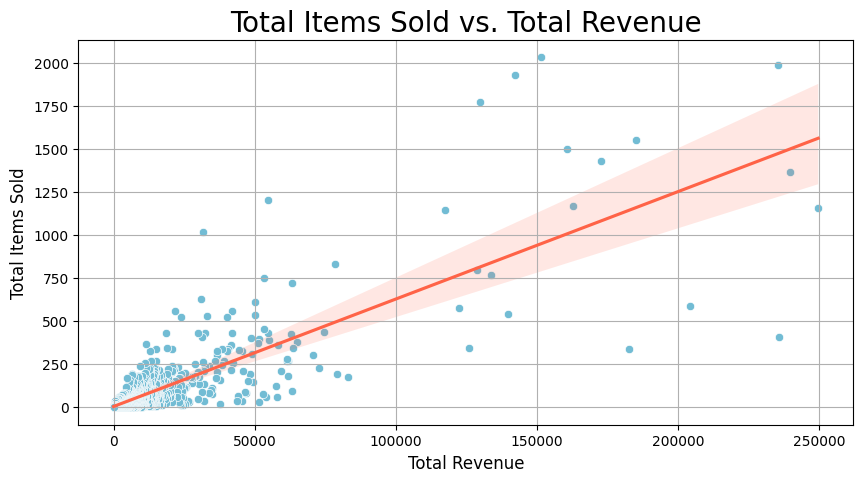

In [ ]:
# Create the scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x=final_df['total_revenue'], y=final_df['total_items'], color="#72BCD4")
sns.regplot(x=final_df['total_revenue'], y=final_df['total_items'], scatter=False, color="#FF6347")
plt.title("Total Items Sold vs. Total Revenue", loc="center", fontsize=20)
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Total Items Sold", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

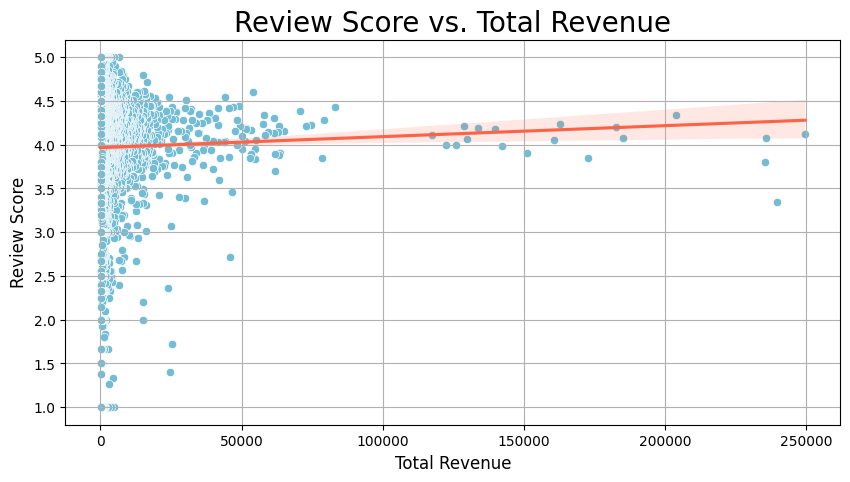

In [ ]:
# Create the scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x=final_df['total_revenue'], y=final_df['review_score'], color="#72BCD4")
sns.regplot(x=final_df['total_revenue'], y=final_df['review_score'], scatter=False, color="#FF6347")
plt.title("Review Score vs. Total Revenue", loc="center", fontsize=20)
plt.xlabel("Total Revenue", fontsize=12)
plt.ylabel("Review Score", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

**EXPLANATION**
- In the comparison of Total Items Sold versus Total Revenue, the steep angle of the regression line suggests that as more items are sold, revenue increases correspondingly.
- Regarding the Review Score versus Total Revenue, the regression line approaches 180 degrees, indicating that we cannot assume a significant relationship between these variables.
- We still require additional information for the second graph.

### Pertanyaan 2:

<ipython-input-25-97644e99fa63>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

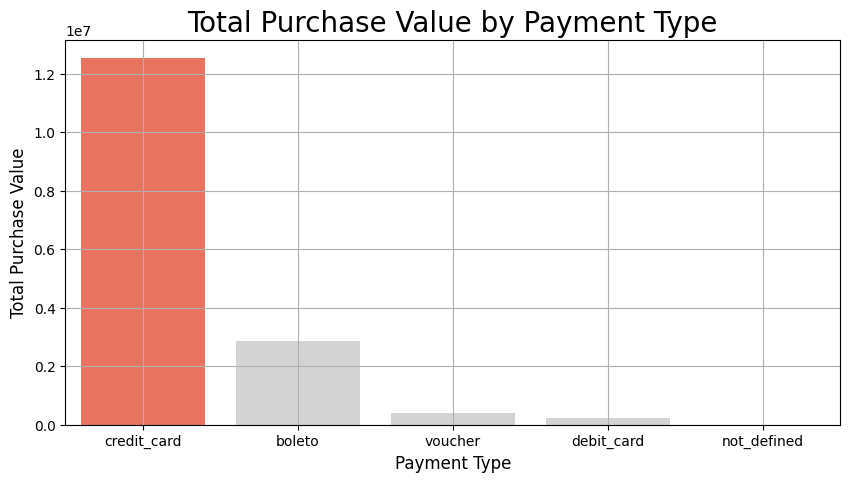

In [ ]:
# Calculate the total purchase value by payment type
total_purchase_value = order_payments_dataset_df.groupby('payment_type')['payment_value'].sum().reset_index()
total_purchase_value.columns = ['payment_type', 'total_purchase_value']

# Sort by total purchase value in descending order
total_purchase_value = total_purchase_value.sort_values(by='total_purchase_value', ascending=False)

# Define colors, with the first color different from the rest
colors = ['#FF6347'] + ['#D3D3D3'] * (len(total_purchase_value) - 1)

# Create the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(
    x='payment_type',
    y='total_purchase_value',
    data=total_purchase_value,
    palette=colors
)
plt.title("Total Purchase Value by Payment Type", loc="center", fontsize=20)
plt.xlabel("Payment Type", fontsize=12)
plt.ylabel("Total Purchase Value", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

**EXPLANATION**
- From this graph, we can conclude that credit cards are the most commonly used payment method in e-commerce, surpassing the second most used method by more than two times.
- However, there is an issue with the grouping, as it is not specific enough due to the inclusion of a length-1 tuple.

## Analisis Lanjutan (Opsional)

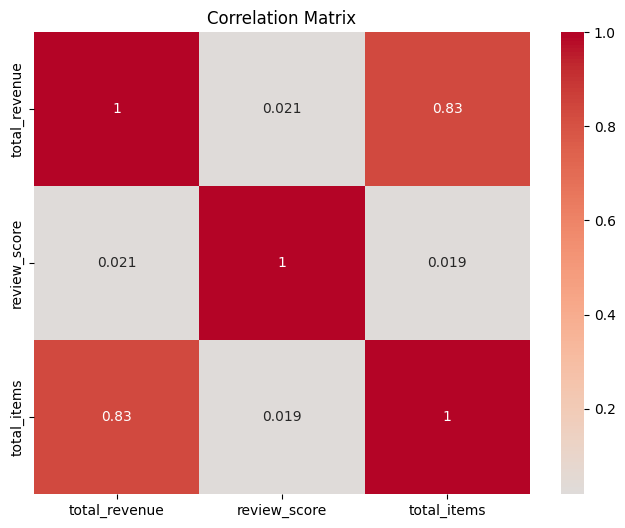

In [ ]:
# Calculate the correlation matrix
correlation_matrix = final_df[['total_revenue', 'review_score', 'total_items']].corr()

# Display the correlation matrix
# print(correlation_matrix)
# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

After examining the correlation coefficient, we can conclude that there is a weak relationship between the review score and the total number of items.

In [ ]:
# Combine all DataFrames into one
all_df = pd.concat(dataframes.values(), ignore_index=True)

# Save the combined DataFrame to a CSV file
all_df.to_csv("all_data.csv", index=False)

print("All data has been successfully combined and saved to 'all_data.csv'.")

Saved /content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset_modified.csv
Saved /content/drive/MyDrive/E-Commerce Public Dataset/geolocation_dataset_modified.csv
Saved /content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset_modified.csv
Saved /content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset_modified.csv
Saved /content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset_modified.csv
Saved /content/drive/MyDrive/E-Commerce Public Dataset/sellers_dataset_modified.csv
Saved /content/drive/MyDrive/E-Commerce Public Dataset/products_dataset_modified.csv
Saved /content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset_modified.csv
Saved /content/drive/MyDrive/E-Commerce Public Dataset/product_category_name_translation_modified.csv


In [ ]:
for df_name, df in dataframes.items():
    output_file_path = os.path.join(folder_path, df_name.replace('_df', '') + '_modified.csv')
    df.to_csv(output_file_path, index=False)
    print(f'Saved {output_file_path}')

## Conclusion

- Conclution pertanyaan 1

In summary, our analysis reveals several key insights:

The comparison of Total Items Sold versus Total Revenue indicates a strong positive correlation, as evidenced by the steep angle of the regression line, suggesting that an increase in the number of items sold leads to a corresponding increase in revenue.

Conversely, the Review Score versus Total Revenue analysis shows that the regression line approaches 180 degrees, indicating a lack of significant relationship between these two variables.

Furthermore, our examination of the correlation coefficient demonstrates that there is only a weak relationship between the review score and the total number of items.

Overall, while sales volume has a substantial impact on revenue, the review score appears to have limited influence on both revenue and the total number of items sold.
- Conclution pertanyaan 2

From the graph, we can conclude that credit cards are the dominant payment method in e-commerce, being used more than twice as often as the second most popular method. However, there is a grouping issue where the data lacks specificity due to the inclusion of a length-1 tuple, which may affect the clarity of the analysis.